In [31]:
import pandas as pd



In [32]:
import os
print(os.getcwd())

C:\Users\Nupur Singh


In [33]:
df = pd.read_csv("healthcare_insurance_data.csv")
print(df.head())
print(df.info())

  Patient_ID  Age  Gender     Region Smoker   BMI Chronic_Disease  \
0      P0001   56  Female       West     No  26.5             Yes   
1      P0002   69    Male       West     No  21.8              No   
2      P0003   46    Male  Northeast     No  24.2             Yes   
3      P0004   32  Female  Southeast    Yes  21.0              No   
4      P0005   60    Male       West     No  36.8             Yes   

   Claim_Amount  Approved_Amount Diagnosis Claim_Status  
0       3550.34          2317.28       Flu     Approved  
1       6910.63          6153.17       Flu     Rejected  
2       2168.15          2010.12    Injury     Approved  
3       8457.04          5796.49    Injury     Rejected  
4       2310.29          1853.64       Flu     Rejected  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Patient_ID       200 non-null    ob

In [34]:
# Handle missing values
df.fillna({'Claim_Status': 'Pending'}, inplace=True)

# Convert categorical variables
df['Smoker'] = df['Smoker'].astype('category')
df['Gender'] = df['Gender'].astype('category')

In [35]:
# Total claims
print("Total Claims:", df['Claim_Amount'].sum())

# Average approved amount
print("What is the average approved amount:", df['Approved_Amount'].mean())

# Approval Rate
approval_rate = (df['Claim_Status'] == 'Approved').mean()
print("What is the approval rate:", round(approval_rate * 100, 2), "%")

Total Claims: 907133.0900000001
What is the average approved amount: 3596.8207500000003
What is the approval rate: 69.5 %


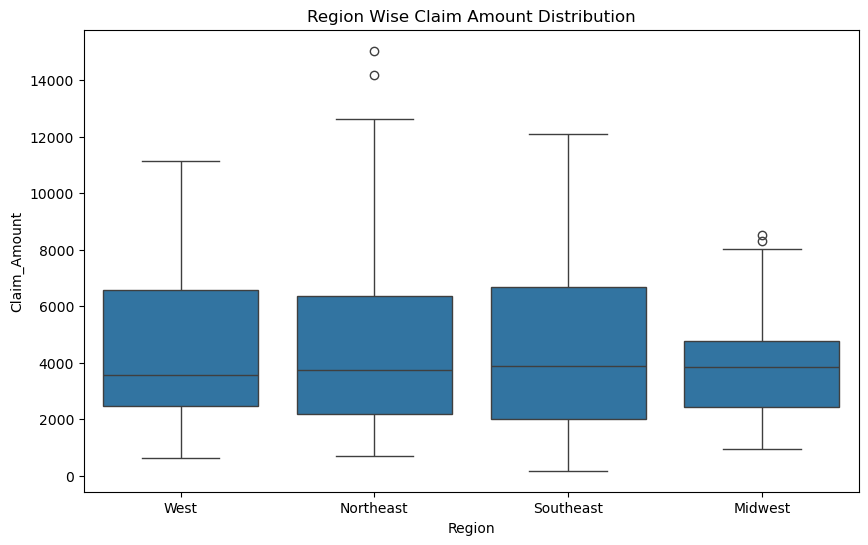

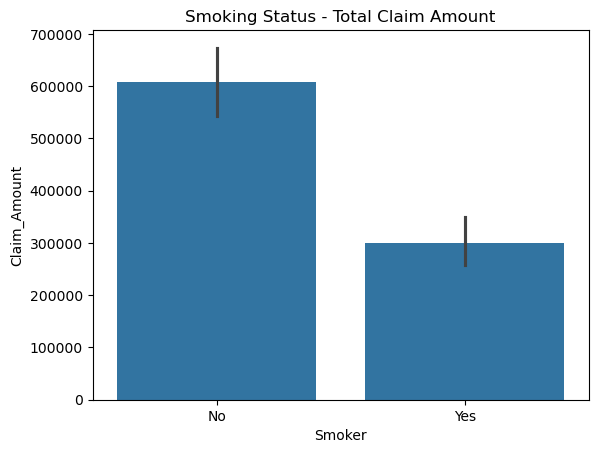

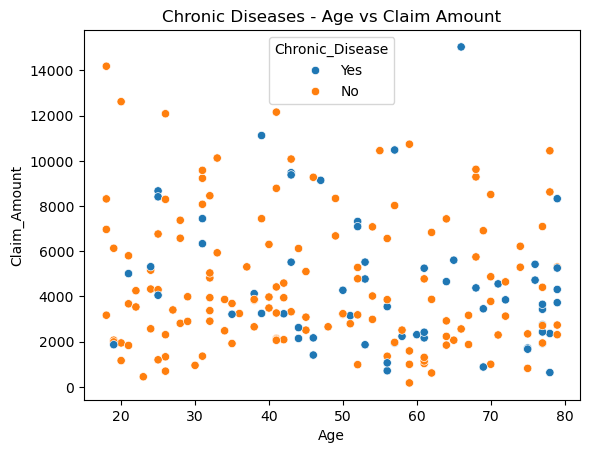

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

# Claim amount by region
plt.figure(figsize=(10,6))
sns.boxplot(x='Region', y='Claim_Amount', data=df)
plt.title('Region Wise Claim Amount Distribution')
plt.show()

# Smoker vs Non-smoker Claims
sns.barplot(x='Smoker', y='Claim_Amount', data=df, estimator=sum)
plt.title("Smoking Status - Total Claim Amount")
plt.show()

# Age vs Claim Amount
sns.scatterplot(x='Age', y='Claim_Amount', hue='Chronic_Disease', data=df)
plt.title("Chronic Diseases - Age vs Claim Amount")
plt.show()

6. Insights & Key Takeaways
        Smokers are seen to be having a higher average claim amounts.

         Chronic disease patients are seen to be filing a larger claim.

        Claim approvals were seen to be higher in the Midwest region.

        The BMI and Claim_Amount are seen to be having a weak positive correlation.

In [37]:
# Flag unusually high claim amounts
df['Mark_Fraud_Flag'] = df['Claim_Amount'] > df['Claim_Amount'].quantile(0.95)
print(df[df['Mark_Fraud_Flag'] == True])

    Patient_ID  Age  Gender     Region Smoker   BMI Chronic_Disease  \
26       P0027   55    Male  Southeast    Yes  19.0              No   
34       P0035   78    Male       West     No  27.0              No   
37       P0038   66    Male  Northeast     No  22.7             Yes   
40       P0041   59    Male       West     No  21.8              No   
54       P0055   20    Male  Northeast    Yes  28.4              No   
86       P0087   57    Male  Southeast     No  29.6             Yes   
155      P0156   26    Male  Southeast     No  26.7              No   
164      P0165   41    Male  Northeast     No  23.0              No   
169      P0170   39  Female       West     No  24.4             Yes   
172      P0173   18  Female  Northeast    Yes  27.3              No   

     Claim_Amount  Approved_Amount      Diagnosis Claim_Status  \
26       10452.72          8592.49  Heart Disease     Approved   
34       10445.42          9446.80         Cancer     Approved   
37       15040.58   

In [38]:
df.to_csv("cleaned_insurance_data.csv", index=False)

In [39]:
# Create dummy data
import numpy as np
np.random.seed(42)
data = {
    'Region': np.random.choice(['Northeast', 'Southeast', 'Midwest', 'West'], 200),
    'Smoker': np.random.choice(['Yes', 'No'], 200, p=[0.3, 0.7]),
    'Age': np.random.randint(18, 80, 200),
    'Claim_Amount': np.random.gamma(shape=2, scale=2000, size=200),  # Skewed distribution
    'Chronic_Disease': np.random.choice(['Yes', 'No'], 200, p=[0.25, 0.75])
}
df = pd.DataFrame(data)
df

,Region,Smoker,Age,Claim_Amount,Chronic_Disease
0,Midwest,Yes,62,2156.734298,No
1,West,No,49,6433.652642,No
2,Northeast,No,69,2681.342689,Yes
3,Midwest,No,47,1987.696896,Yes
4,Midwest,No,64,11110.145131,Yes
...,...,...,...,...,...
195,Southeast,No,47,1123.668237,Yes
196,Southeast,No,34,3887.437046,Yes
197,West,Yes,66,2961.132514,Yes
198,Northeast,No,79,4890.141087,No


C:\Users\Nupur Singh\AppData\Local\Temp\ipykernel_45008\1929188643.py:5: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data_to_plot, labels=regions)


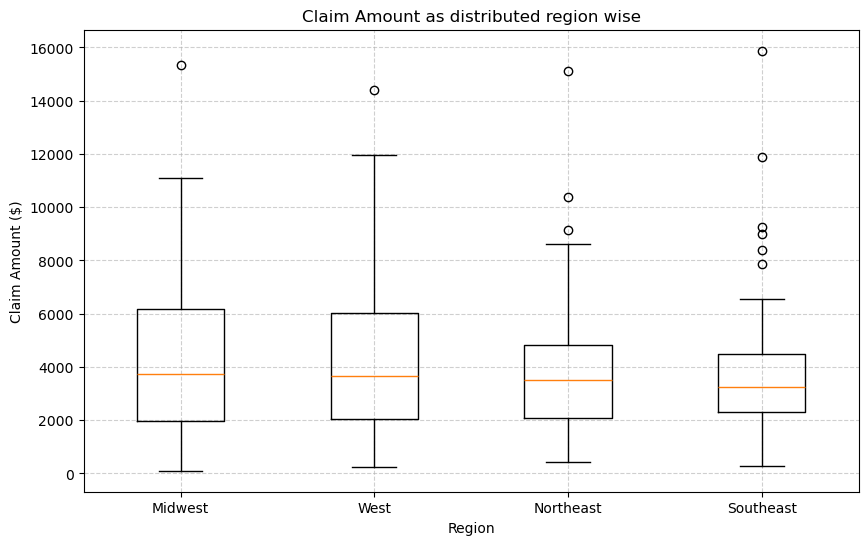

In [40]:

# Boxplot: Claim Amount Distribution by Region
plt.figure(figsize=(10,6))
regions = df['Region'].unique()
data_to_plot = [df[df['Region'] == region]['Claim_Amount'] for region in regions]
plt.boxplot(data_to_plot, labels=regions)
plt.title('Claim Amount as distributed region wise')
plt.ylabel('Claim Amount ($)')
plt.xlabel('Region')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

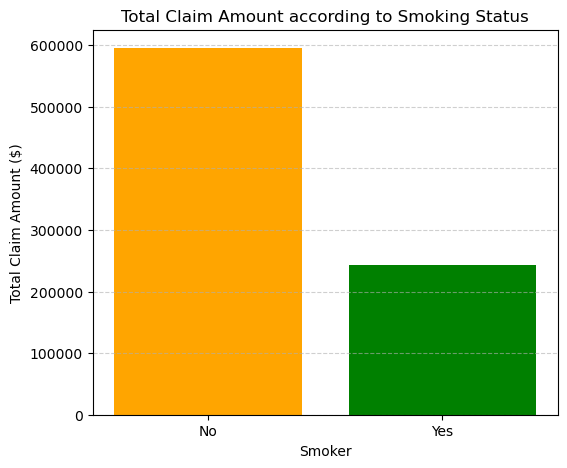

In [41]:
# Bar Chart: Total Claim Amount by Smoking Status
totals = df.groupby('Smoker')['Claim_Amount'].sum()
plt.figure(figsize=(6,5))
plt.bar(totals.index, totals.values, color=['orange', 'green'])
plt.title('Total Claim Amount according to Smoking Status')
plt.ylabel('Total Claim Amount ($)')
plt.xlabel('Smoker')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

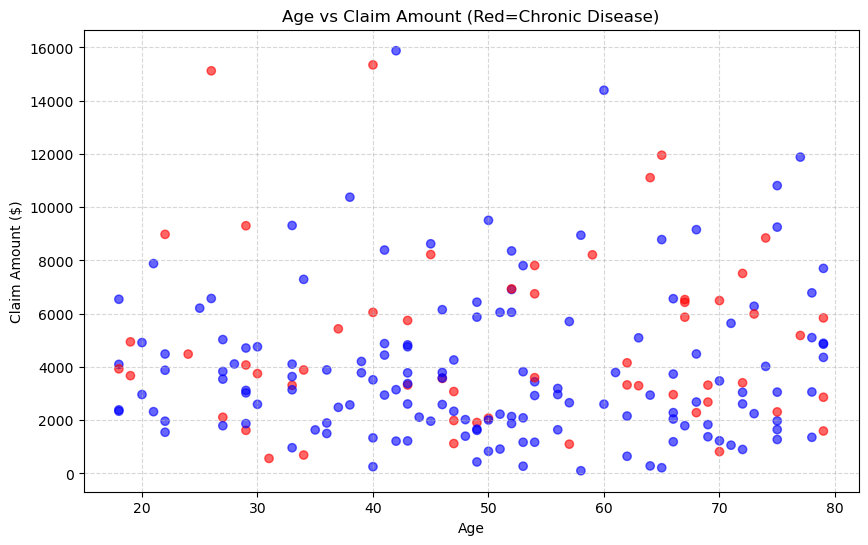

In [42]:
# Scatter Plot: Age vs Claim Amount colored by Chronic Disease
colors = df['Chronic_Disease'].map({'Yes':'red', 'No':'blue'})
plt.figure(figsize=(10,6))
plt.scatter(df['Age'], df['Claim_Amount'], c=colors, alpha=0.6)
plt.title('Age vs Claim Amount (Red=Chronic Disease)')
plt.xlabel('Age')
plt.ylabel('Claim Amount ($)')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

In [43]:
Histogram: Distribution of Claim Amounts
plt.figure(figsize=(8,5))
plt.hist(df['Claim_Amount'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Claim Amounts')
plt.xlabel('Claim Amount ($)')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

SyntaxError: invalid syntax (2820964422.py, line 1)

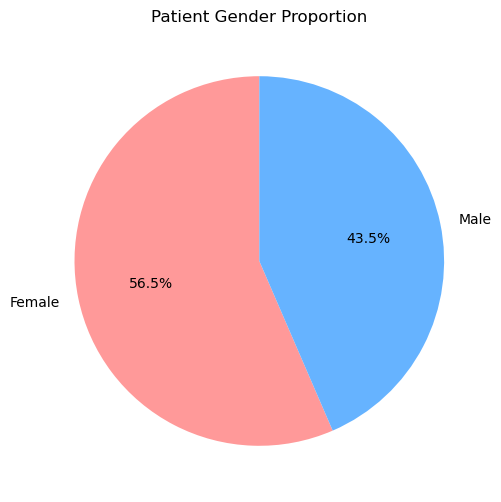

In [44]:
# Pie Chart: Patient Gender Proportion
# Add a Gender column for this example
df['Gender'] = np.random.choice(['Male', 'Female'], size=len(df), p=[0.48, 0.52])

gender_counts = df['Gender'].value_counts()
plt.figure(figsize=(6,6))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', colors=['#ff9999','#66b3ff'], startangle=90)
plt.title('Patient Gender Proportion')
plt.show()

C:\Users\Nupur Singh\AppData\Local\Temp\ipykernel_45008\503939693.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_claim_by_age = df.groupby('Age_Group')['Claim_Amount'].mean()


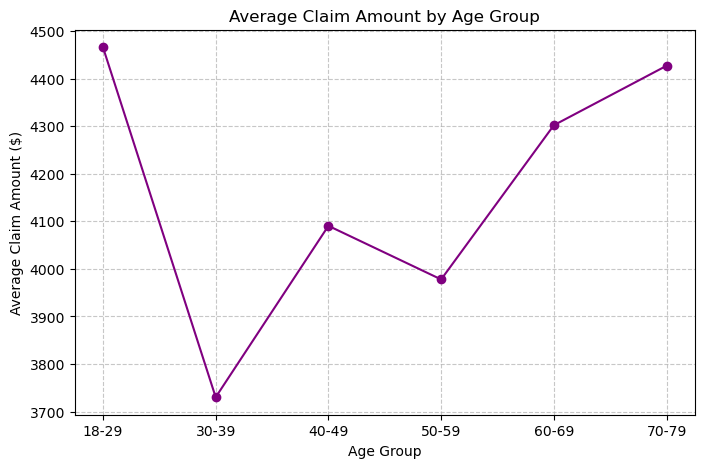

In [45]:
#Line Plot: Average Claim Amount by Age Group
# Create Age groups
bins = [18, 30, 40, 50, 60, 70, 80]
labels = ['18-29', '30-39', '40-49', '50-59', '60-69', '70-79']
df['Age_Group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

avg_claim_by_age = df.groupby('Age_Group')['Claim_Amount'].mean()

plt.figure(figsize=(8,5))
plt.plot(avg_claim_by_age.index, avg_claim_by_age.values, marker='o', linestyle='-', color='purple')
plt.title('Average Claim Amount by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Average Claim Amount ($)')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

Claim Amount Distribution by Region (Boxplot) Insight:
The Midwest and Southeast regions shows a wider spread and higher outliers in claim amounts.

West region had more consistency and moderate claims. This indicates fewer extreme medical expenses.

Implication: Insurers will have to investigate region-specific healthcare costs or pricing policies.

Total Claim Amount by Smoking Status (Bar Chart) Insight:
Smokers had a significantly higher total claim amount than non-smokers.

Despite smokers being a smaller group, their costs were disproportionately high.

Implication: Smoking still is very strong player of insurance claims — underwriting and premium adjustments may be justified.

Age vs Claim Amount (Scatter Plot, colored by Chronic Disease) Insight:
Older patients generally filed higher claims.

Patients who had chronic diseases (in red) had consistently higher claim amounts at any age.

Implication: Chronic disease management programs will still help to reduce longer term costs for insurers and also help in improving improve patient outcomes.

Distribution of Claim Amounts (Histogram) Insight:
Most claims fall within the 
8,000 range.

There is a right-skewed distribution. This means a small number of patients account for very high claims.

Implication: There are cost control strategies that could focus on the top 5% of claimants driving the majority of expenses.

Patient Gender Proportion (Pie Chart) Insight:
The male and female distribution is nearly equal (52% Female, 48% Male in dummy data).

There is no gender is significantly overrepresented in the insured population.

Implication: There is also no immediate gender bias detected in coverage; further analysis can explore if costs differ by gender.

Average Claim Amount by Age Group (Line Plot) Insight:
There is average claim amount which is increasing with the age, especially past age 50.

We also notice peak claim costs in 60–69 and 70–79 age groups.

Implication: The aging population will put an upward pressure on claim costs — insurers mustly prepare for higher payouts and age-related coverage needs.